In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Pear.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         3012 non-null   object 
 1   precio_venta    2972 non-null   float64
 2   peso            3012 non-null   float64
 3   t_id            3012 non-null   object 
 4   fecha_venta     3002 non-null   object 
 5   hora_venta      3002 non-null   object 
 6   tipo            3012 non-null   object 
 7   fecha_recogida  3012 non-null   object 
 8   hora_recogida   3012 non-null   object 
 9   lote            3012 non-null   object 
 10  marca           3012 non-null   object 
 11  coste_inicial   2914 non-null   float64
 12  proveedor       3012 non-null   object 
dtypes: float64(3), object(10)
memory usage: 306.0+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2972.000000  3012.000000    2914.000000
mean       3.514214   297.456671       1.997279
std        0.711508   100.122572       0.504342
min        1.242408   -55.036449       0.515158
25%        3.052060   231.444624       1.663360
50%        3.509984   298.648442       2.002783
75%        3.988161   366.395666       2.347335
max        6.852005   663.945792       3.845743


In [ ]:
print(df.head())

         cliente  precio_venta        peso           t_id fecha_venta  \
0  CompraMaestra      4.017282  175.188762   Pear 102.png  2022/09/05   
1  CompraMaestra           NaN  316.317440  Pear 1115.png  2022/09/08   
2  CompraMaestra      4.792378  299.875187  Pear 1157.png  2022/09/13   
3  CompraMaestra           NaN  491.788322  Pear 1203.png  2022/09/15   
4  CompraMaestra      3.101822  412.970460  Pear 1216.png  2022/09/20   

  hora_venta  tipo fecha_recogida hora_recogida                lote  \
0      15:00  Pear     2022/09/05         07:00    V69G82M48N46V78M   
1      10:00  Pear     2022/09/08         05:00  V69G82M49M53J80T71   
2      05:00  Pear     2022/09/12         22:00  V69G82M49Q55J80T71   
3      22:00  Pear     2022/09/15         16:00  V69G82M50L51J80T71   
4      09:00  Pear     2022/09/20         02:00  V69G82M50M54J80T71   

                 marca  coste_inicial                        proveedor  
0        EmbrujoFrutal       3.279286  Cultivos Hidropónicos 

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -55.0364490191734
Peso máximo: 663.9457915894682
Total negativos: 7
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
DulceEncanto,1
RicoBosque,1
JugosoAroma,1
ManjarFruity,1
SabrosoEdén,1
ExquisitoJardín,1
SinfoníaDelicias,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Energía Renovable AgroSol,2
Agrícola Solaris Energía,1
AgroSoftware Soluciones,1
Reforestación Ecológica VerdeVida,1
RiegoSmart Innovación,1
Cultivos Hidropónicos Innovagro,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['V69G82P53R46V78M', 'V69G82O48O54M55Q46V78M', 'V69G82N48M56J80T71',
       'V69G82T57L46V78M', 'V69G82R54P46V78M', 'V69G82N49O50J80T71',
       'V69G82Q54P46V78M'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes V69G82.

In [ ]:
print(negativos["peso"])

687     -9.384808
1420   -55.036449
1818    -6.446540
2375    -7.275342
2446   -45.584212
2704   -46.491476
2809   -26.714431
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                 cliente  precio_venta       peso             t_id  \
687   Mercado del Barrio      3.805286  -9.384808     Pear 456.png   
1420           EcoTienda      3.848889 -55.036449  pear_0_6175.png   
1818  Mercado Fresco XYZ      3.916491  -6.446540    Pear 2018.png   
2375    La Canasta Feliz      3.006338  -7.275342     Pear 890.png   
2446       MaxiAlimentos      3.828131 -45.584212     Pear 664.png   
2704  Distribuidora Alfa      4.078060 -46.491476    Pear 2132.png   
2809          MegaAhorro      2.073879 -26.714431     Pear 564.png   

     fecha_venta hora_venta  tipo fecha_recogida hora_recogida  \
687   2022/09/08      19:00  Pear     2022/09/08         10:00   
1420  2022/09/11      18:00  Pear     2022/09/11         14:00   
1818  2022/09/14      22:00  Pear     2022/09/14         17:00   
2375  2022/09/11      03:00  Pear     2022/09/10         20:00   
2446  2022/09/25      07:00  Pear     2022/09/25         02:00   
2704  2022/09/19      16:00  Pear     2022/

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 298 g:", len(df[df['peso'] > 298]))
print("Peso máximo:", df.loc[df['peso'] > 298, 'peso'].max())

Cantidad de pesos mayores de 298 g: 1511
Peso máximo: 663.9457915894682


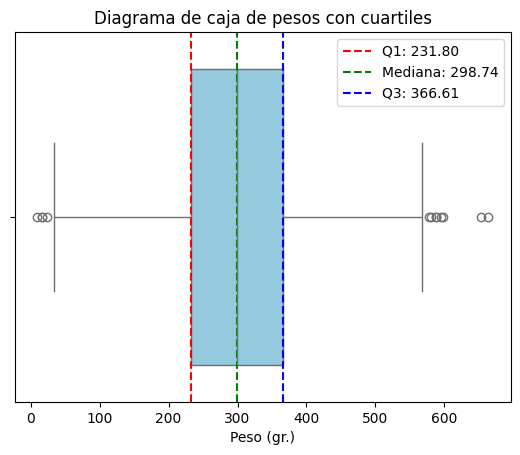

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

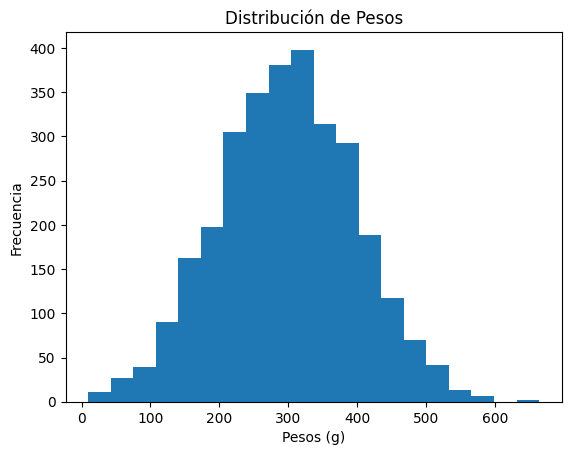

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 8
231.7988759397016
366.6098660776864
134.8109901379848


El peso medio de una pera oscila entre los 100 y los 250 gr.

In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso             t_id
1368    9.650153    Pear 1831.png
878    16.199675     Pear 569.png
982    16.509409  pear_0_7034.png
3003   24.184253  pear_0_5564.png
1966   34.407195    Pear 1332.png
...          ...              ...
2487  588.351849   pear_0_898.png
2873  595.763233    Pear 1777.png
2625  598.449178     Pear 442.png
1384  653.044105     Pear 372.png
294   663.945792    Pear 1997.png

[3005 rows x 2 columns]


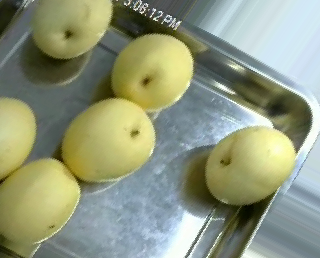

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Pear/pear_0_7034.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

El peso de la imagen es de 16.509409 teniendo 6 peras en la imagen.
El peso no encajaria ni con una sola unidad.

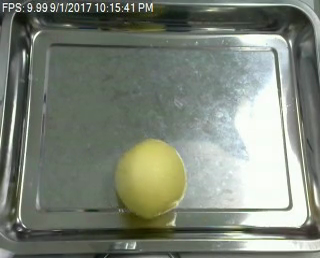

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Pear/Pear 372.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En esta imagen en cambio podemos observar una sola pera y un peso de 653.044105 gr.

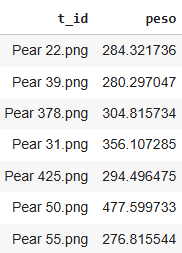

Todas las imagenes anteriores contienen una sola fruta y tiene pesos mucho más elevados que imagenes con muchas más frutas.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.5151580928718671
Coste inicial máximo: 3.845743458638944
Coste inicial negativos: 0
Coste inicial nulos: 98


No encontramos negativos y los costes iniciales van desde los 0.51 hasta los 3.84


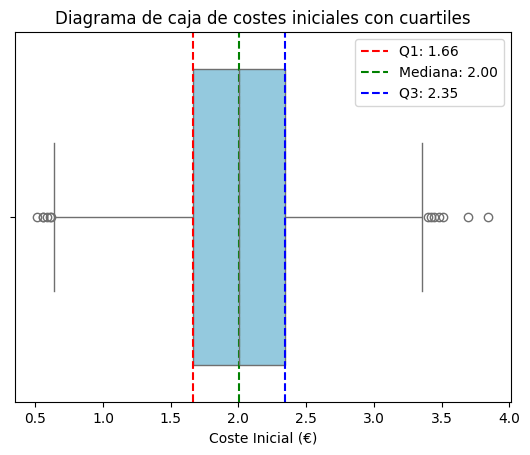

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

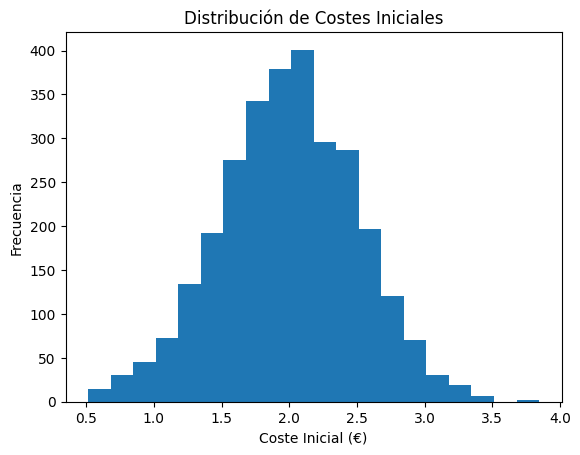

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 7
1.6633596414634773
2.3473352047558076
0.6839755632923303


Una vez analizados los costes iniciales y viendo que tenemos 7 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.2424075725235717
Precio venta máximo: 6.8520045230071975
Total negativos: 0
Total nulos: 40


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor
1108,La Gran Cosecha,NaN,502.834938,Pear 1917.png,NaN,NaN,Pear,2022/09/26,04:00,V69G82M57M55J80T71,PaladarDorado,2.173145,Tecnosembradoras del Sur


uno de los 40 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

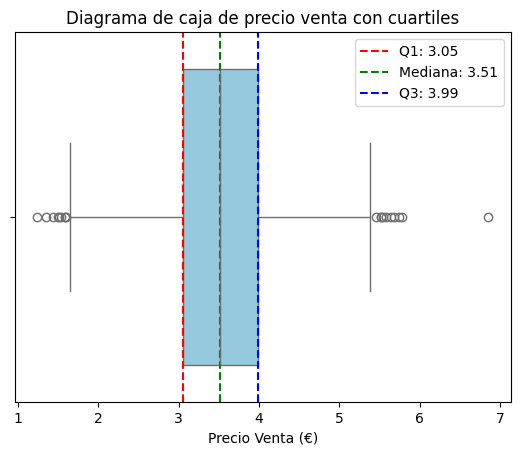

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

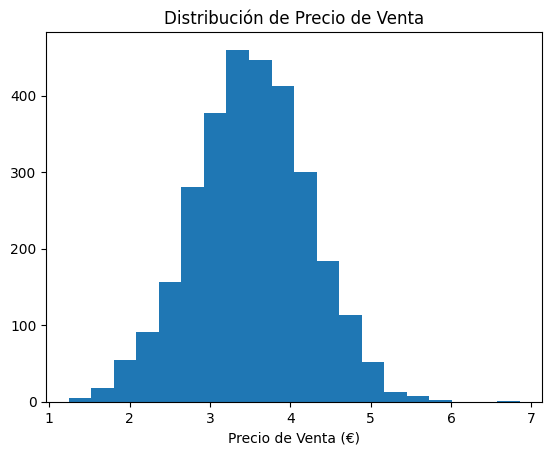

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)


Total outliers: 10
3.0520602895713473
3.9881610643718046


En precio venta tenemos 10 outliers mientras que en coste inicial teníamos 7.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,Tienda Familiar,5.744009,297.165822,Pear 1571.png,2022/09/22,04:00,Pear,2022/09/21,20:00,V69G82M53S49J80T71,...,297.165822,2022/09/22,04:00,Pear,2022/09/21,20:00,V69G82M53S49J80T71,EmbrujoFrutal,3.510260,Cultivos Hidropónicos Innovagro
1,Tienda Selecta,6.852005,89.160309,pear_0_7452.png,2022/09/15,00:00,Pear,2022/09/14,17:00,V69G82O48O55P53N46V78M,...,89.160309,2022/09/15,00:00,Pear,2022/09/14,17:00,V69G82O48O55P53N46V78M,TesoroNaturaleza,3.694832,EcoFungicidas Morales
2,El Bazar de la Comida,5.544195,291.306414,pear_0_5101.png,2022/09/27,11:00,Pear,2022/09/27,02:00,V69G82O48O53M48M46V78M,...,291.306414,2022/09/27,11:00,Pear,2022/09/27,02:00,V69G82O48O53M48M46V78M,PlacerFrutado,3.845743,Reforestación Ecológica VerdeVida


3 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-28 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
1204,-28 days
993,-28 days
1606,-26 days
1131,-26 days
2077,-24 days
...,...
1396,NaT
1809,NaT
1950,NaT
1960,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de peras a un proveedor en un solo día.

**En el caso de las peras esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las manzanas no encontramos más de un tipo de fruta ni más de una marca.

**Con las peras esta norma tampoco se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.720244,-0.617506
precio_venta,0.720244,1.000000,0.031358
rentabilidad,-0.617506,0.031358,1.000000


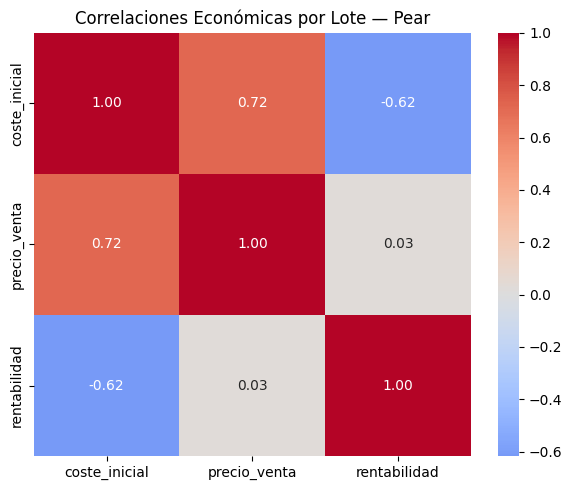

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Pear')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.720244  0.004100
coste_inicial      0.720244       1.000000  0.000454
peso               0.004100       0.000454  1.000000


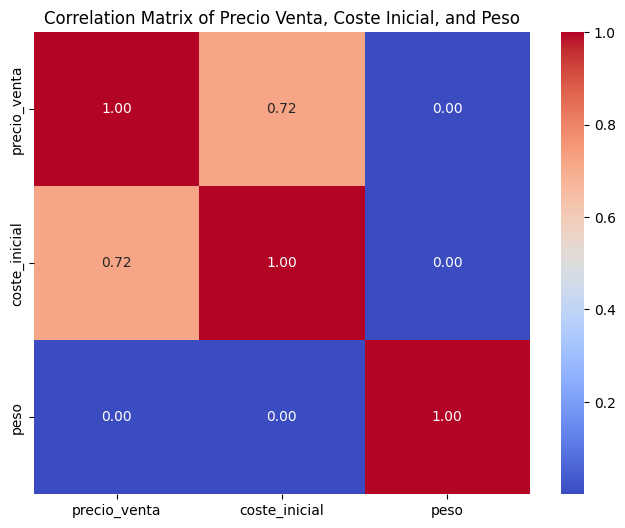

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.72 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las peras y pasamos a analizar la siguiente fruta.